In [246]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as py
import numpy as n
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
import nltk
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.cluster import KMeans,DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [247]:
df = p.read_csv("Applications_for_Machine_Learning_internship_edited.xlsx - Sheet1.csv",encoding='utf-8')

In [248]:
df.head()

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00


In [249]:
df = df.drop(['Name',"Performance_12",'Performance_10'],axis=1)

In [250]:
df.shape

(1136, 11)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Python (out of 3)                                                                                  1136 non-null   int64 
 1   Machine Learning (out of 3)                                                                        1136 non-null   int64 
 2   Natural Language Processing (NLP) (out of 3)                                                       1136 non-null   int64 
 3   Deep Learning (out of 3)                                                                           1136 non-null   int64 
 4   Other skills                                                                                       1070 non-null   object
 5  

In [252]:
df.isnull().sum()*100/len(df)

Python (out of 3)                                                                                     0.000000
Machine Learning (out of 3)                                                                           0.000000
Natural Language Processing (NLP) (out of 3)                                                          0.000000
Deep Learning (out of 3)                                                                              0.000000
Other skills                                                                                          5.809859
Are you available for 3 months, starting immediately, for a full-time work from home internship?      0.000000
Degree                                                                                                3.785211
Stream                                                                                               14.964789
Current Year Of Graduation                                                                            0.000000
P

In [253]:
df.drop_duplicates(inplace=True)

In [254]:
df.shape

(1133, 11)

In [255]:
df.duplicated().value_counts()

False    1133
dtype: int64

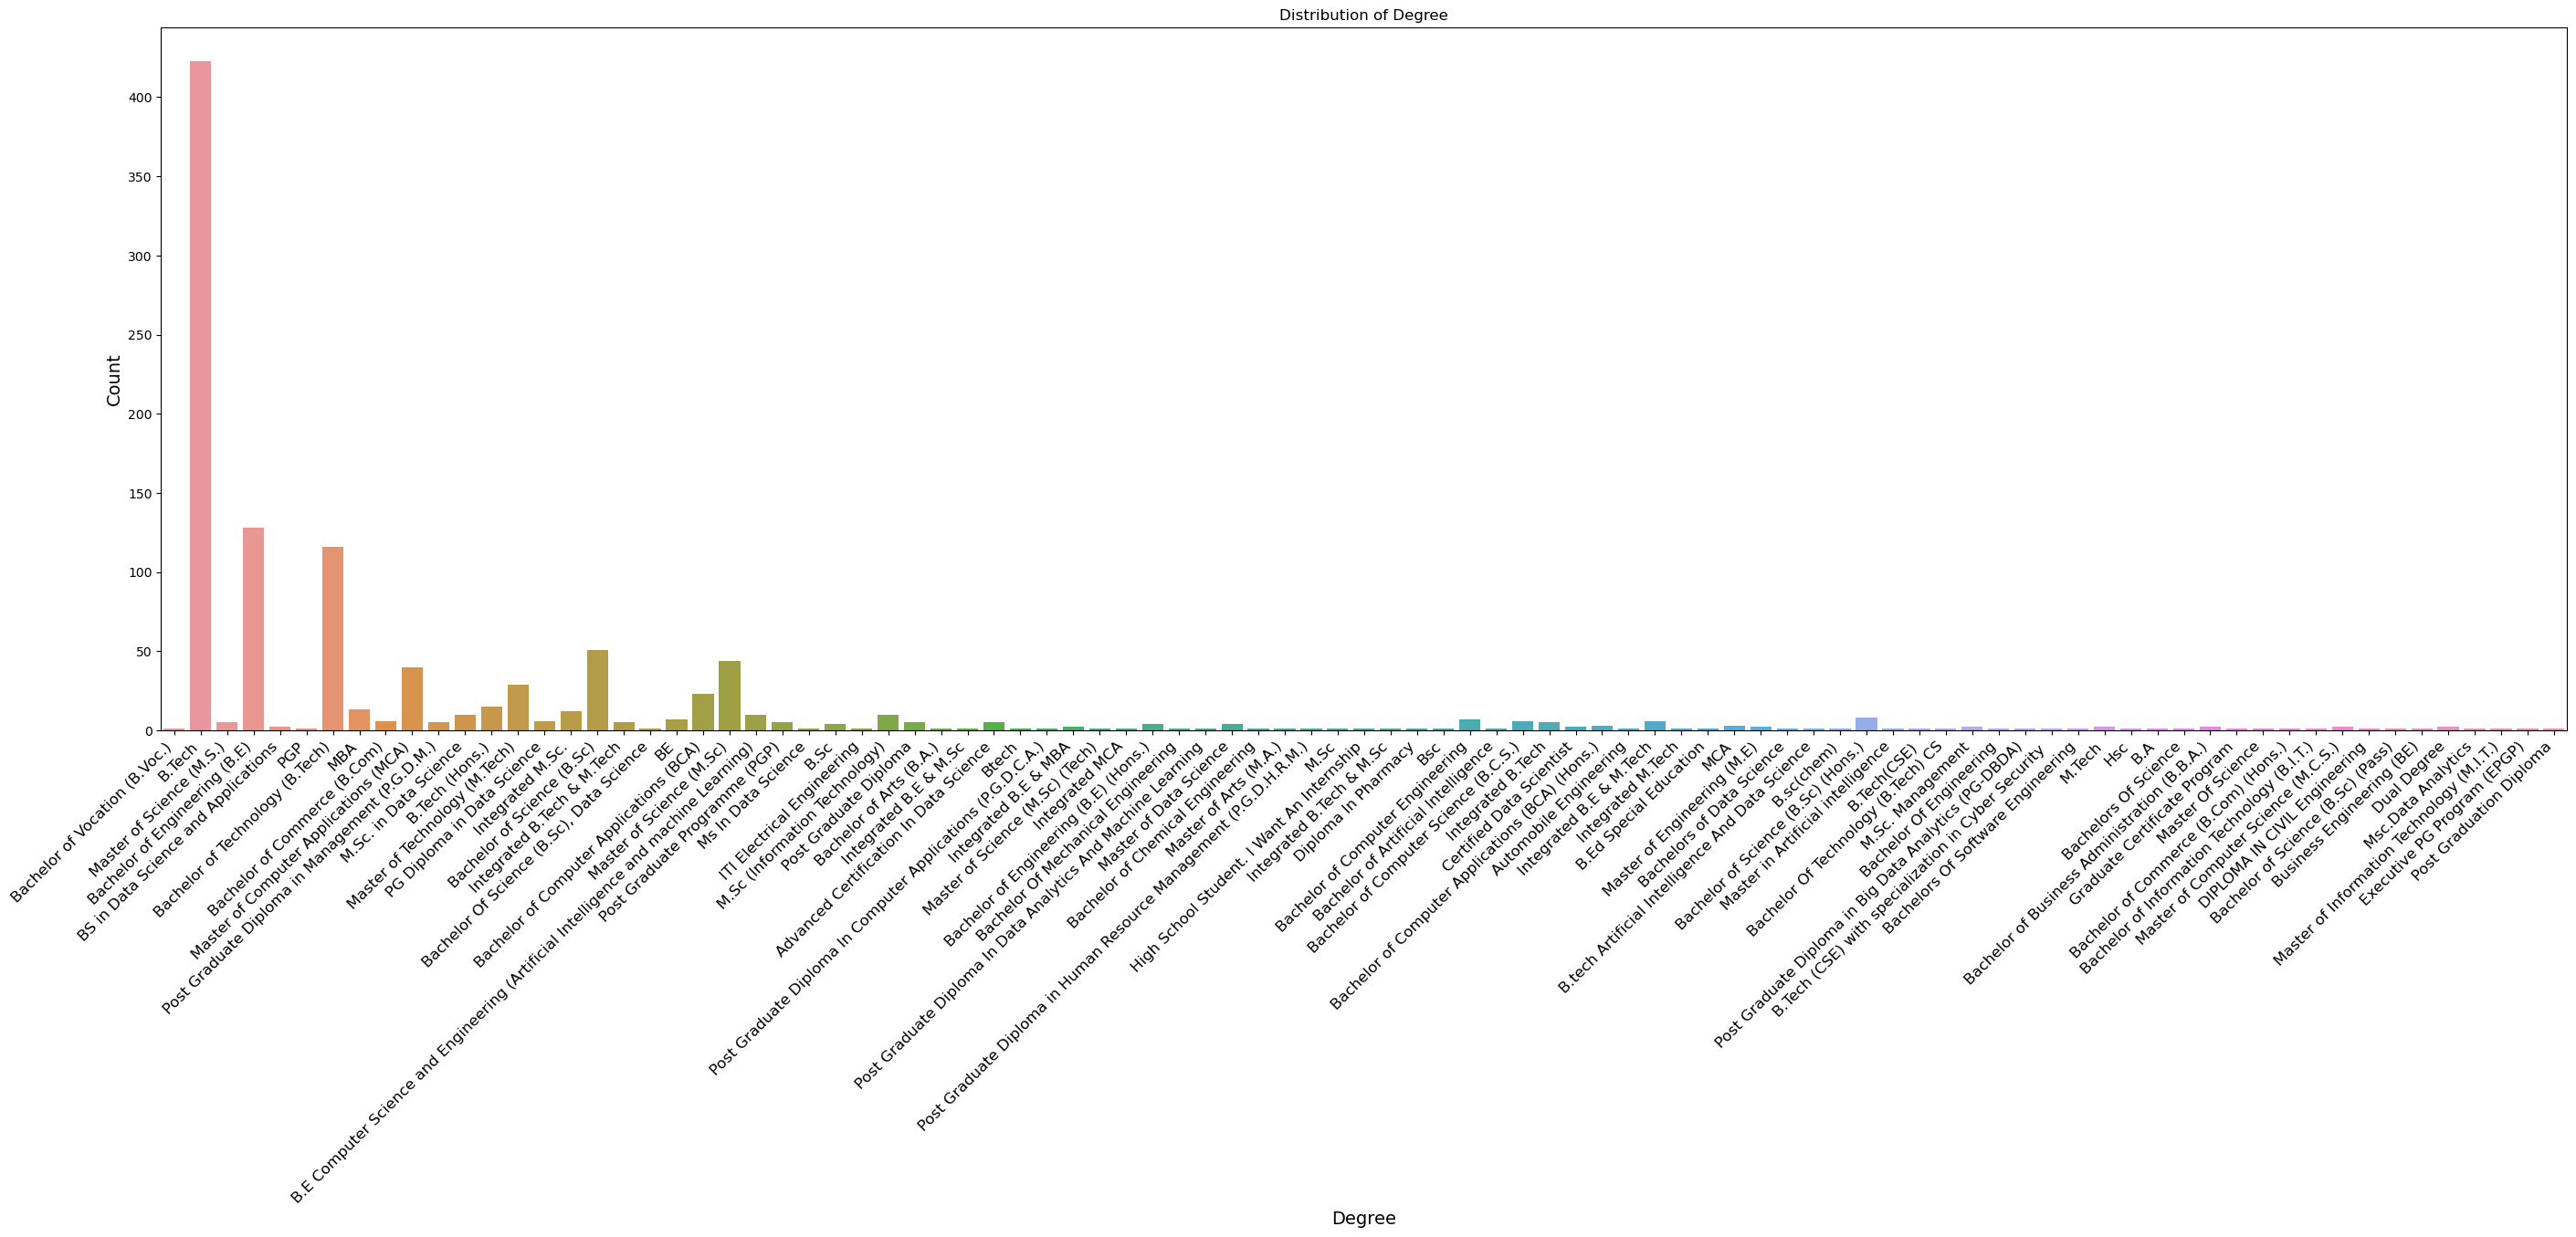

In [256]:
py.figure(figsize=(34,10))
s.countplot(data=df,x='Degree')
py.title('Distribution of Degree')
py.xlabel('Degree', fontsize=14)
py.ylabel('Count', fontsize=14)
py.xticks(fontsize=12, rotation=45, ha='right')
py.show()

Skill(s) required
Deep Learning
Machine Learning
Natural Language Processing (NLP)
Python

Who can apply
Only those candidates can apply who:

1. are available for the work from home job/internship

2. can start the work from home job/internship between 1st Jul'23 and 5th Aug'23

3. are available for duration of 3 months

4. have relevant skills and interests

* Women wanting to start/restart their career can also apply.

as 83% of data have null value in Performance_PG and 57% of data are null in Performance_UG also there is no mention of degree or stream in who can apply section so we can let it drop.

In [264]:
df = df.drop(['Degree','Performance_PG','Performance_UG','Stream'],axis=1)

In [265]:
df.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",2021
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",2024
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",2022
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",2024
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",2023


In [266]:
df.columns

Index(['Python (out of 3)', 'Machine Learning (out of 3)',
       'Natural Language Processing (NLP) (out of 3)',
       'Deep Learning (out of 3)', 'Other skills',
       'Are you available for 3 months, starting immediately, for a full-time work from home internship? ',
       'Current Year Of Graduation'],
      dtype='object')

In [267]:
df.iloc[:, 5].unique()

array(['Yes, I am available for 3 months starting immediately for a full-time internship.',
       'No, I am available full time but I have my exams in July which may continue for one week.',
       'No, Since I am a student , I am available for 3 months starting immediately for a part-time internship.',
       'No, I done in online mode only.',
       'No, I am Available, For Work From Home 3 Months Part Time Internship Because I Am A Student Of Engineering.',
       "No, I'm available after July since i have exams in 15 days .",
       'No, I have only one month time.',
       'No, As i am still in 7th sem of my degree i wont be available full time but i can work after college hours (except on days with tests/exams), so if you let me know the details of the work and the possible timings for it, it will allow me to manage my time according to it.',
       'No, I am Available for six months but I need to attend my exams subject to university conducting them. .',
       "No, I'm availab

In [268]:
def consent(m):
    t = m.split(',')
    return t[0]

In [269]:
df.iloc[:, 5] = df.iloc[:, 5].apply(consent)

In [270]:
df.iloc[:, 5]

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1131    Yes
1132    Yes
1133    Yes
1134    Yes
1135    Yes
Name: Are you available for 3 months, starting immediately, for a full-time work from home internship? , Length: 1133, dtype: object

In [271]:
df.iloc[:, 5] = p.get_dummies(df.iloc[:, 5],drop_first=True)

In [272]:
df.iloc[:, 5].unique()

array([1, 0], dtype=uint8)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1135
Data columns (total 7 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Python (out of 3)                                                                                  1133 non-null   int64 
 1   Machine Learning (out of 3)                                                                        1133 non-null   int64 
 2   Natural Language Processing (NLP) (out of 3)                                                       1133 non-null   int64 
 3   Deep Learning (out of 3)                                                                           1133 non-null   int64 
 4   Other skills                                                                                       1070 non-null   object
 5   

In [282]:
def plot_req_skill_with_agreed_cand(df,hue_value):
    py.figure(figsize=(10,2))
    s.countplot(data=df,x=df.iloc[:,5],hue=hue_value)
    py.legend(loc='best')

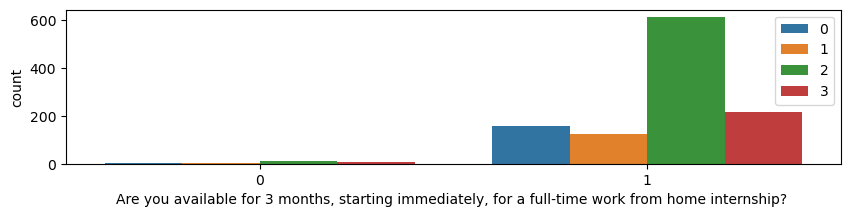

In [283]:
plot_req_skill_with_agreed_cand(df,'Python (out of 3)')

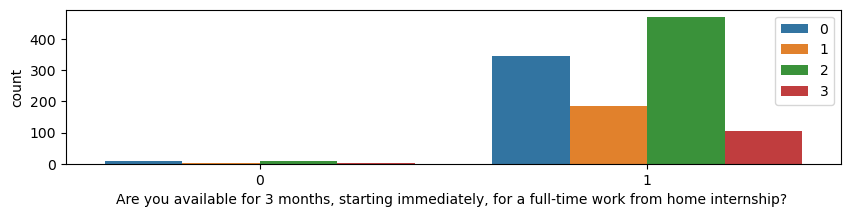

In [284]:
plot_req_skill_with_agreed_cand(df,'Machine Learning (out of 3)')

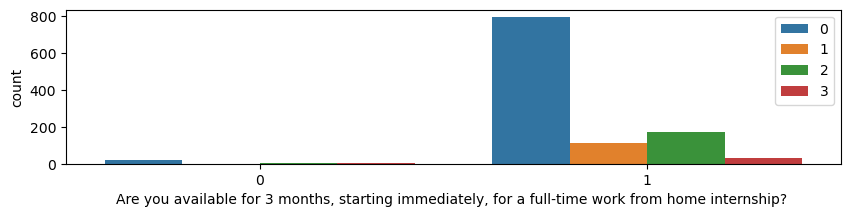

In [285]:
plot_req_skill_with_agreed_cand(df,'Natural Language Processing (NLP) (out of 3)')

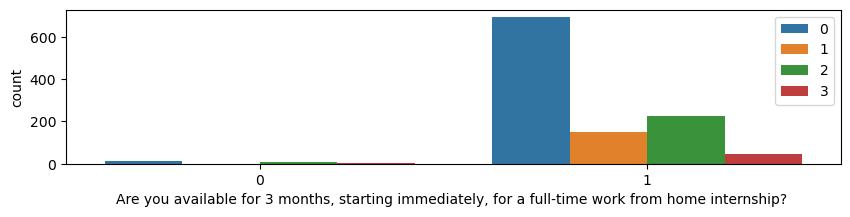

In [286]:
plot_req_skill_with_agreed_cand(df,'Deep Learning (out of 3)')

In [135]:
df['required_skills'] = (df['Python (out of 3)'] + df['Machine Learning (out of 3)'] + df['Natural Language Processing (NLP) (out of 3)'] + df['Deep Learning (out of 3)']) / 4

In [136]:
df.head(5)

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation,required_skills
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",1,2021,0.50
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",1,2024,0.50
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",1,2022,1.00
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",1,2024,1.75
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",1,2023,1.00


<AxesSubplot:xlabel='Are you available for 3 months, starting immediately, for a full-time work from home internship? ', ylabel='count'>

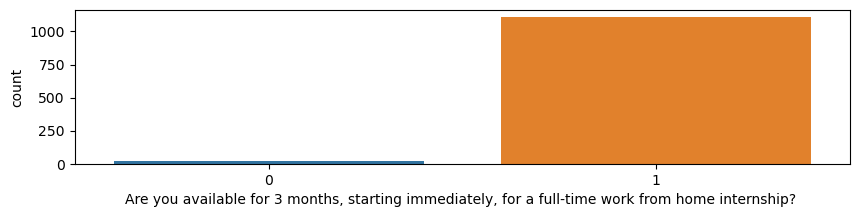

In [137]:
py.figure(figsize=(10,2))
s.countplot(data=df,x=df.iloc[:, 5])

In [138]:
df[df.iloc[:, 5]==0].index

Int64Index([  45,   97,  152,  155,  247,  337,  350,  386,  392,  534,  579,
             623,  668,  677,  683,  706,  730,  735,  804,  833,  862, 1044,
            1079, 1104],
           dtype='int64')

In [139]:
df['agreed_candi_required_skill'] = round((df['required_skills']+df.iloc[:, 5])/2,2)

In [140]:
df.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation,required_skills,agreed_candi_required_skill
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",1,2021,0.50,0.75
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",1,2024,0.50,0.75
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",1,2022,1.00,1.00
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",1,2024,1.75,1.38
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",1,2023,1.00,1.00


In [141]:
df['agreed_candi_required_skill'].median()

1.0

count    1133.000000
mean        1.022489
std         0.370408
min         0.000000
25%         0.750000
50%         1.000000
75%         1.250000
max         2.000000
Name: agreed_candi_required_skill, dtype: float64


<AxesSubplot:ylabel='agreed_candi_required_skill'>

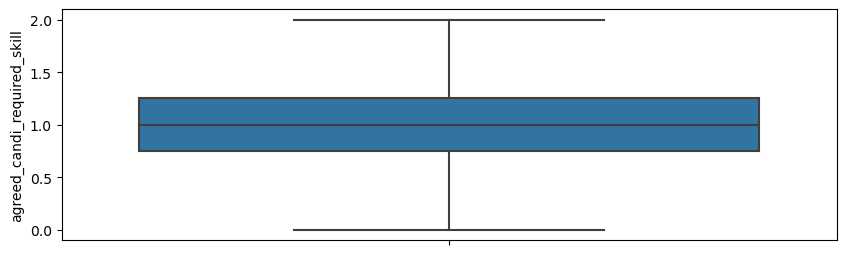

In [142]:
print(df['agreed_candi_required_skill'].describe())
py.figure(figsize=(10,3))
s.boxplot(data=df,y='agreed_candi_required_skill')

# Setting a threshold to convert it to binary classification as it has continous values 

In [143]:
threshold = 1
df['agreed_candi_required_skill'] = n.where(df['agreed_candi_required_skill'] >= threshold, 1, 0)

# TFIDF VECTORIZER

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [145]:
df[df['Other skills'].isnull()]

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation,required_skills,agreed_candi_required_skill
46,0,0,0,0,NaN,1,2023,0.0,0
65,0,0,0,0,NaN,1,2027,0.0,0
95,0,0,0,0,NaN,1,2021,0.0,0
109,0,0,0,0,NaN,1,2023,0.0,0
149,0,0,0,0,NaN,1,2020,0.0,0
...,...,...,...,...,...,...,...,...,...
923,0,0,0,0,NaN,1,2023,0.0,0
952,0,0,0,0,NaN,1,2022,0.0,0
977,0,0,0,0,NaN,1,2023,0.0,0
1056,0,0,0,0,NaN,1,2024,0.0,0


In [146]:
df[df['Other skills'].isnull()].head(30)

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation,required_skills,agreed_candi_required_skill
46,0,0,0,0,NaN,1,2023,0.0,0
65,0,0,0,0,NaN,1,2027,0.0,0
95,0,0,0,0,NaN,1,2021,0.0,0
109,0,0,0,0,NaN,1,2023,0.0,0
149,0,0,0,0,NaN,1,2020,0.0,0
151,0,0,0,0,NaN,1,2022,0.0,0
153,0,0,0,0,NaN,1,2022,0.0,0
158,0,0,0,0,NaN,1,2023,0.0,0
165,0,0,0,0,NaN,1,2020,0.0,0
189,0,0,0,0,NaN,1,2026,0.0,0


In [147]:
df[df['Other skills'].isnull()].tail(36)

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation,required_skills,agreed_candi_required_skill
396,0,0,0,0,NaN,1,2024,0.0,0
397,0,0,0,0,NaN,1,2024,0.0,0
399,0,0,0,0,NaN,1,2024,0.0,0
411,0,0,0,0,NaN,1,2024,0.0,0
437,0,0,0,0,NaN,1,2024,0.0,0
439,0,0,0,0,NaN,1,2024,0.0,0
449,0,0,0,0,NaN,1,2024,0.0,0
451,0,0,0,0,NaN,1,2025,0.0,0
456,0,0,0,0,NaN,1,2021,0.0,0
464,0,0,0,0,NaN,1,2023,0.0,0


In [148]:
df.isna().sum()

Python (out of 3)                                                                                     0
Machine Learning (out of 3)                                                                           0
Natural Language Processing (NLP) (out of 3)                                                          0
Deep Learning (out of 3)                                                                              0
Other skills                                                                                         63
Are you available for 3 months, starting immediately, for a full-time work from home internship?      0
Current Year Of Graduation                                                                            0
required_skills                                                                                       0
agreed_candi_required_skill                                                                           0
dtype: int64

In [149]:
df.dropna()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Current Year Of Graduation,required_skills,agreed_candi_required_skill
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",1,2021,0.50,0
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",1,2024,0.50,0
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",1,2022,1.00,1
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",1,2024,1.75,1
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",1,2023,1.00,1
...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...",1,2021,1.50,1
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...",1,2024,2.75,1
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...",1,2025,2.50,1
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...",1,2024,0.75,0


<AxesSubplot:xlabel='agreed_candi_required_skill', ylabel='count'>

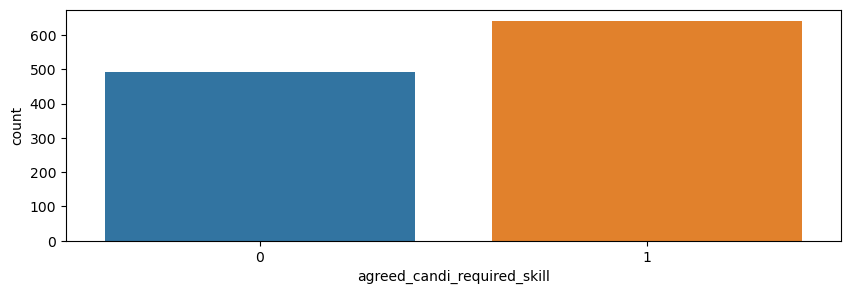

In [150]:
py.figure(figsize=(10,3))
s.countplot(data=df,x='agreed_candi_required_skill')

In [151]:
df['Other skills'][9]

'Android, Artificial Intelligence, C Programming, C++ Programming, Data Analytics, Data Structures, Database Management System (DBMS), Java, Machine Learning, Python, SQL, Cloud Computing, Data Science, Deep Learning, German Proficiency (Spoken), Linux, Neural Networks, SQLite'

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1135
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Python (out of 3)                                                                                  1133 non-null   int64  
 1   Machine Learning (out of 3)                                                                        1133 non-null   int64  
 2   Natural Language Processing (NLP) (out of 3)                                                       1133 non-null   int64  
 3   Deep Learning (out of 3)                                                                           1133 non-null   int64  
 4   Other skills                                                                                       1070 non-null   object

In [153]:
df = df.dropna()

In [154]:
df['Other skills'].isna().sum()

0

In [155]:
# list = []
def tokenize_func(st):
    tokens = nltk.word_tokenize(st)
#     list.append(tokens)
    return ''.join(tokens)

In [156]:
df['other_skills_tokenize'] = df['Other skills'].apply(tokenize_func)

In [157]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,ngram_range=(1, 1),
    stop_words='english',max_features=200)
word_vectorizer.fit(df['other_skills_tokenize'])

TfidfVectorizer(max_features=200, stop_words='english', sublinear_tf=True)

In [158]:
vectorised_data = word_vectorizer.transform(df['Other skills'])

In [159]:
word_vectorizer.get_feature_names()

['accounting',
 'adobeaftereffects',
 'adobeillustrator',
 'adobephotoshop',
 'adobephotoshoplightroomcc',
 'adobepremierepro',
 'adobexd',
 'ajax',
 'algorithms',
 'amazonwebserver',
 'amazonwebservices',
 'analoganddigitalcircuits',
 'android',
 'angular2',
 'angular7',
 'angularjs',
 'animation',
 'arcgis',
 'arduino',
 'artificialintelligence',
 'asp',
 'autocad',
 'aws',
 'bengaliproficiency',
 'bigdataanalytics',
 'biology',
 'blender3d',
 'blockchain',
 'blogging',
 'bootstrap',
 'businessanalysis',
 'businessresearch',
 'canva',
 'chemistry',
 'clientrelationship',
 'cloudcomputing',
 'computernetworking',
 'computernetworks',
 'computervision',
 'contentwriting',
 'copywriting',
 'cprogramming',
 'creativewriting',
 'css',
 'dart',
 'dataanalytics',
 'databasemanagementsystem',
 'databasetesting',
 'datascience',
 'datastructures',
 'dbms',
 'deeplearning',
 'designthinking',
 'development',
 'devops',
 'digitalmarketing',
 'digitalsignalprocessing',
 'django',
 'docker',
 'ec

In [161]:
vectorised_data

<1070x200 sparse matrix of type '<class 'numpy.float64'>'
	with 8015 stored elements in Compressed Sparse Row format>

# TRAIN TEST SPLIT

In [162]:
X = vectorised_data
y = df['agreed_candi_required_skill']

In [163]:
# X

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [165]:
from sklearn.utils import compute_class_weight

classWeights = compute_class_weight("balanced", classes = n.unique(y),
                                     y = y)

classWeights = dict(zip(n.unique(y), classWeights))

print(classWeights)

{0: 1.25, 1: 0.8333333333333334}


In [167]:
X_train.shape

(856, 200)

In [168]:
X_test.shape

(214, 200)

# RANDOMFOREST CLASSIFIER

In [175]:
n_estimators = [int(x) for x in n.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in n.linspace(10, 1000,10)]
min_samples_split = [2, 8, 15, 20,30]
min_samples_leaf = [1, 2, 4,6,8]
random_params= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_params)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 8, 15, 20, 30], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [176]:
randcv_model = [("RF",RandomForestClassifier(),random_params)]

In [177]:
model_param = {}
for name, model, params in randcv_model:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=200,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [178]:
random.best_params_

{'n_estimators': 800,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 120,
 'criterion': 'entropy'}

In [180]:
rf = RandomForestClassifier(class_weight=classWeights,n_estimators=800,max_features='auto', min_samples_split = 8, max_depth = 120,min_samples_leaf= 2,criterion = 'entropy')

In [181]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1.25, 1: 0.8333333333333334},
                       criterion='entropy', max_depth=120, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=800)

In [182]:
pred_rf = rf.predict(X_test)
print(model)
accuracy = accuracy_score(y_test,pred_rf)
print(f"Accuracy Score: {round(accuracy*100,2)}%")
print('\n')
print(classification_report(y_test,pred_rf))

RandomForestClassifier()
Accuracy Score: 75.7%


              precision    recall  f1-score   support

           0       0.64      0.79      0.71        80
           1       0.85      0.74      0.79       134

    accuracy                           0.76       214
   macro avg       0.75      0.76      0.75       214
weighted avg       0.77      0.76      0.76       214



Thank you for having faith in me .It helped me learn new things like how i can deal with such huge dataset.It was bit challenging but at the same time it motivated me to learn more.